 Цифровая (относительная,
нормированная) частота. Формально такая частота определяется как
отношение реальной частоты к частоте дискретизации:
$f_0 = F_0/F_д,$ где $F_д = 1/T$ - частота дискретизации,
T – интервал между отчетами сигнала.
Значение  $1/F_0$ точности
соответствует числу точек на период для гармонического сигнала.

#**Упражнения 1-2. Демонстрация теоремы Котельникова.**

1. Физически невозможно задать число периодов гармонического сигнала
больше, чем половина имеющихся точек. При превышении данного
числа получаем, в любом случае, значение P от нуля до N/2.
2. Значения $P$ и $P = P+N*k$, где k-целое число дадут абсолютно одинаковую
картинку. То есть все эти значения числа периодов будут соответствовать
одному сигналу! Получается, что для дискретных процессов
высокочастнотные сигналы эквивалентны низкочастотным и
воспринимаются как низкочастотные. Такой эффект можно назвать
стробоскопическим. Но именно благодаря ему возможно
дискретизировать высокочастотные сигналы с низкой частотой выборки.
3. Значение $N/2$ соответствует цифровой частоте 0.5 – максимально
допустимой цифровой частоте, оно же – максимальное допустимое число
периодов на отрезке из N точек.
4. Интервалы [0; N/2], [N/2; N], [N; 3*N/2],... соответствуют так называемым
зонам Найквиста (1-ая, 2 –ая, 3-я, … соответственно)

**?** Запишите соотношение для P, аналогичное заключению 2, связывающие
значения P в интервалах [0; N/2] и [N/2; N].

**?** Если вы попытаетесь для численных значений примера задать 290
периодов, то сколько увидите на графике? Какой зоне Найквиста это
будет соответствовать?

# 2. Cлучай возведения в квадрат
Как возведение в квадрат меняет требования к частоте дискретизации.
Нелинейные системы для цифровых сигналов в отличие от аналоговых
обеспечивают точное преобразование в соответствие с нелинейным
алгоритмом. При этом в спектре сигнала появляются новые частоты
(гармоники, комбинационные), но эти частоты в цифровом случае четко заданы
как количество частот, так и их значения. С другой стороны, спектр дискретных
сигналов периодичен, и новые частоты на выходе преобразователя могут
наложиться на копии существующих. Поэтому желательно, чтобы все
частотные компоненты после нелинейной системы оставались в пределах одной
зоне Найквиста, что заведомо обеспечит отсутствие наложения копий.

**?** Как изменятся ограничения при возведении сигнала в куб?

**?** Посмотрите вариант суммы сигнала и его квадрата. Возможно ли при
этом ситуация, когда получится сигнал одной частоты? При каких
условиях это возможно?

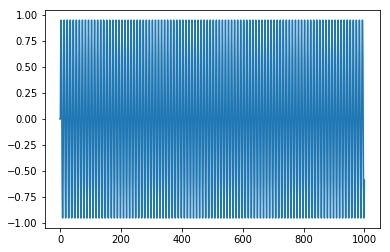

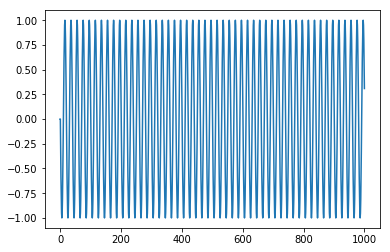

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

#число периодов на отрезке
P1 = 100
P2 = 950
#количество точек на графике
N = 1000
k1 = P1/N
k2 = P2/N
#пустые массивы значений
X = np.array(0) 
Y = np.array(0)
Z = np.array(0)
w1, w2 = 1, 1 #частоты сигналов
#создание двух гармонических сигналов
#@interact(x=(0, 100))
def harm(x):
    A = np.array(0)
    for t in range(N):
        A = np.append(A, np.sin(2*np.pi*t*(x/N)))
    plt.plot(A)
    #plt.xticks([])
    plt.show()
    return(A)


X = harm(x=P1)
Y = harm(x=P2)

#**Упражнение 3. Спектры синусоидального сигнала**
Обычно рассматривают амплитудный, фазовый и
энергетический спектры. Мы остановимся на первом и последнем. Энергетический получается возведением в квадрат амплитудного. В случе цифровых сигналов, спектр получают, используя дискретное преобразование
Фурье (или оптимизированный алгоритм быстрого преобразования Фурье).

1. Гармонический сигнал для случая целого числа периодов дает один
ненулевой отсчет в половине отчетов спектра (второй симметричный
будет, если число периодов ненулевое и не максимально допустимое).
2. Положение пика в номерах отчетов строго соответствует числу
периодов (этот факт можно использовать как трактовку спектра).
3. При вращении ручки «Число периодов на отрезке» положения пика
сдвигается вправо до достижения максимального числа периодов, а после
превышения такового – влево до того момента, пока не сравняется с
числом точек N.
4. Для спектра характерна периодическая структура, которая повторяется через
зону Найквиста, а спектры в соседних зонах зеркально симметричны
(справедливо для действительных сигналов).


**?** Сформулируйте вывод аналогичный п.1-п.3 из первого примера для
спектра гармонического сигнала.

**?** Опишите, какие изменения в спектре произойдут, если добавить
квадратор, как в упражнении 2.

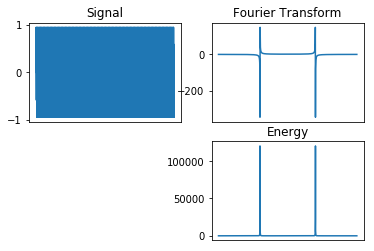

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#число периодов на отрезке
P = 300
#количество точек на графике
N = 1000
k = P/N
#пустые массивы значений
X = np.array(0) 
S = np.array(0)
w1, w2 = 1, 1 #частоты сигналов

#создание гармонического сигнала
for t in range(N):
    X = np.append(X, np.sin(2*np.pi*w1*t*k))

S = np.fft.fft(X)
plt.subplot(221)
plt.title('Signal')
plt.plot(X)
plt.xticks([])
plt.subplot(222)
plt.title('Fourier Transform')
plt.xticks([])
plt.plot(np.real(S))
plt.subplot(224)
plt.title('Energy')
plt.xticks([])
plt.plot(np.real(S)**2)
plt.show()

#Упражнение 4. Импульсная и частотная характеристики цифровых фильтров.
Под цифровым фильтром мы будет понимать дискретную систему с постоянными параметрами, причем ограничимся линейными системами. В таком случае система будет описываться уравнением
$y(n) = -\sum_{k=1}^N a(k)y(n-k)+\sum_{k=0}^M b(k)x(n-k)$

Где $x(n)$ – отсчеты входного сигнала,

$y(n)$- отсчеты сигнала на выходе системы,

$a(k), b(k)$ – коэффициенты фильтра,

$N$ и $M+1$ – количество параметров $a(k), b(k)$ соответственно. 

Максимальное число из N и M называется порядком фильтра.

Меняя тип фильтра, посмотрите какие импульсные характеристика, АЧХ и
ФЧХ характерны для каждого типа фильтра, как влияют значения граничных
частот на указанные функции.

**?** Как связаны длительность импульсной характеристики и ширина полосы
пропускания АЧХ и почему?

**?** В каких случаях импульсная характеристика принимает вид сглаженного
видеоимпульса, а в каких – затухающего радиоимпульса и почему?

**?** Для каких типов фильтров ФЧХ имеет значения одного знака, а в каких –
разного и почему?

Использование функции **scipy.signal.iirdesign**:

Passband and stopband edge frequencies. For digital filters, these are in the same units as fs. By default, fs is 2 half-cycles/sample, so these are normalized from 0 to 1, where 1 is the Nyquist frequency. For example:

Lowpass: wp = 0.2, ws = 0.3
Highpass: wp = 0.3, ws = 0.2
Bandpass: wp = [0.2, 0.5], ws = [0.1, 0.6]
Bandstop: wp = [0.1, 0.6], ws = [0.2, 0.5]

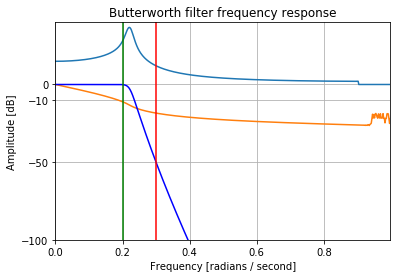

In [18]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal

#число периодов на отрезке
P = 15
#количество точек на графике
N = 100
k = P/N
#пустые массивы значений
X = np.array(0) 
S = np.array(0)
#частота пропускания и частота заграждения
wp, ws = 0.2, 0.3
#усиление в полосе пропускания и подавление вне её
gpass, gstop = 0.1, 50.0

s = signal.iirdesign(wp, ws, gpass, gstop, 
                     analog=False, ftype='butter', output='sos')
b, a = signal.iirdesign(wp, ws, gpass, gstop, 
                        analog=False, ftype='butter', output='ba')

w, h = signal.freqz(b, a)
w2, gd = signal.group_delay((b, a))

plt.plot(w/np.pi, gd)
plt.plot(w/np.pi, np.unwrap(np.angle(h)))
plt.plot(w/np.pi, 20*np.log10(abs(h)), 'b')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.ylim(-100, 40)
plt.yticks([-100, -50, -10, 0])
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(wp, color='green') # cutoff frequency
plt.axvline(ws, color='red') # cutoff frequency

plt.show()

#Упражнение 5. Сумма и разность отсчетов как цифровые фильтры
Выполнение простейших манипуляций, таких как сложение и вычитание соседних отсчетов, позволительно рассматривать как простые системы, являющиеся цифровыми фильтрами. При этом в зависимости от операции будут получаться фильтры разного типа.
1. Система, реализующая суммирование 10 отчетов (10 выбрано для наглядности, можно было взять любое число от 2 до N) является интегратором или ФНЧ, а также усреднителем. Сдвиг выходного сигнала обусловлен необходимостью накопления данных, т.е данные из прошлого сигнала дают значения на выходе в будущем.
2. Система, реализующая вычитание отсчетов является диффернцирующей схемой или фильтром высоких частот, что объясняет превращение синуса на ее входе в косинус на выходе.

**?** Постройте импульсные и частотные характеристики реализованных
фильтров.

**?** Почему при числе периодов 10 и кратном сигнал на выходе
«суммирующего» фильтра уменьшается почти до нуля, а при других
значениях числа периодов принимает большие значения?

**?** Почему сигнал на выходе дифференцирующего фильтра при малом числе
периодов по амплитуде меньше единицы, а при большом не превосходит
двух?

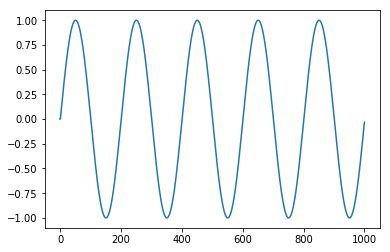

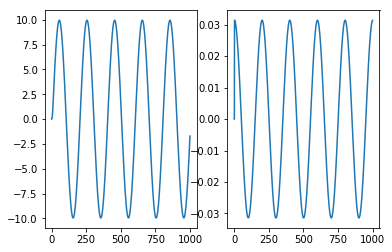

In [32]:
#число периодов на отрезке
P1 = 5
#количество точек на графике
N = 1000
k1 = P1/N
#пустые массивы значений
X = np.array(0) 
X = harm(x=P1)
sumreg = np.zeros(10)
i = 0
Y = np.zeros(len(X)) 
Z = np.zeros(len(X)) 
tmp = 0
while (i < len(X)):
    j = 0
    while (j < 9):
        sumreg[j] = sumreg[j+1]
        Y[i] += sumreg[j+1]
        j += 1
    sumreg[9] = X[i]
    Y[i] += X[i]
    Z[i] = X[i] - tmp
    tmp = X[i]
    i += 1
plt.subplot(121)
plt.plot(Y)
plt.subplot(122)
plt.plot(Z)

#Упражнение 6. Сравнение селективности КИХ и БИХ фильтров
Основная классификация цифровых фильтров происходит по ограниченности импульсной характеристики: фильтры с конечной импульсной характеристикой называют КИХ-фильтрами (FIR, они, как правило, трансверсальные, т.е. не имеют обратной связи); в противовес им фильтры с бесконечной импульсной характеристикой (БИХ, IIR) обладают обратной связью и еще называются рекурсивными. Формальное отличие один от других в том, что коэффициенты a(k)≡0 для k=1,… N. Существует много особенностей, характерных для фильтров каждого из перечисленных типов, но в этом упражнении мы остановимся на одном отличии этих типов фильтров-селективности АЧХ, т.е. способности лучше выделять спектральные компоненты сигнала в определенной полосе частот.
Строго говоря, в этом примере вычисляется не АЧХ фильтров, а его квадрат, но для качественной оценки это роли не играет. Установите одну и ту же граничную частоту и элементом управления задаем один и тот же порядок обоих фильтров (БИХ и КИХ).

1. АЧХ БИХ-фильтра имеет более резкий спад на границе полосы
пропускания, чем у КИХ, она же ближе к прямоугольному виду.
2. Чем выше порядок. Тем круче спадает АЧХ. Но той же степени крутизны
спада КИХ-фильтр достигает при гораздо более высоком порядке, чем
БИХ. Следовательно, рекурсивные фильтры менее ресурсоемки.

#Упражнение 7. Пример неустойчивого фильтра. Устранение неустойчивости заменой одного фильтра каскадом из фильтров 2 порядка
Одно из свойств, характерное только для БИХ-фильтров – их потенциальная неустойчивость. Она проявляется в том, что при конечном входном сигнале получается бесконечный отклик. Известен способ борьбы с таким эффектом – замена одного фильтра высокого порядка каскадом из звеньев 2-го порядка.
Если значение порядка будет установлено малым, то на обоих графиках будет гармонический сигнал, как на нижнем графике рисунка 7б, но без нулевых отчетов в левой части (т.е без ощутимого сдвига, задержки). Увеличивайте порядок до тех пор, пока сигнал на верхнем графике не перестанет быть гармоническим. Такой эффект произойдет, когда порядок станет больше 50-ти. Выходной же сигнал каскадного соединения таких же фильтров второго порядка остается гармоническим, но повергается заметному сдвигу.
1. БИХ-фильтры могут быть неустойчивыми, что обусловлено наличием обратной связи.
2. БИХ-фильтры 2-го порядка заведомо устойчивы, их каскадное содинение предпочтительно фильтру высокого порядка.

**?** Как зависит величина задержки сигнала от порядка фильтра?

**?** Одинаковы ли импульсные характеристики одного фильтра порядка N и
каскадного соединения N/2 фильтров 2-го порядка?

#Упражнение 8. Пример получения неказуальной системы при занулении отчетов спектра
Рассмотрим пример манипуляций со спектром сигнала, которые могли бы быть альтернативой фильтрации. Известно, что при прохождении сигнала через фильтр, его спектр подвергается преобразованию вида:

$Y(e^{jω})=H(e^{j\omega})X(e^{j\omega})$

Где $Y(e^{jω})$ – спектр выходного сигнала,
$X(e^{j\omega})$ – спектр входного сигнала,
$H(e^{j\omega})$ – частотная характеристика фильтра.
Тем самым правильно подобрав алгоритм трансформации спектра, можно выполнить математически эквивалентное преобразование без использования фильтрации, т.е. операций, какие заложены в разностное уравнение. Вычисление коэффициентов фильтра зачастую самая сложная часть задачи фильтрации, поэтому возникает соблазн в альтернативном способе, сводящемся к вычислению сигнала из преобразованного спектра. Однако такой подход таит опасность получения физически неадекватного решения. Как вариант, можно получить выходной сигнал, нарушающий принцип причинности, т.е. отклик системы будет начинаться раньше, чем возникло воздействие. Такую систему принят называть неказуальной.

Приравняйте к нулю спектральные компоненты с 257 по 511, эти значения  подобраны неспроста. Цель манипуляций с компонентами спектра -  занулить равное количество элементов в левой и правой половине спектра, чтобы после обратного Фурье-преобразования получился вещественный сигнал. При этом мы без необходимости присваиваем нулю N/2+1 –ый элемент, что некритично.
Запустите прибор. Вы увидите сигнал в виде меандра, его АЧХ, тот же АЧХ с половиной зануленных отсчетов и соответствующий такому спектру сигнал. Вы можете ограничить шкалу по оси $x$ сотней с небольшим отчетов. Обратите внимание! У исходного сигнала первые 100 отсчетов нулевые, а после наших преобразований они стали ненулевыми, начиная с первого – нарушился принцип причинности! Значит наша система получилась неказуальной.

1. Необдуманная трансформация спектра сигнала может привести к
нарушению принципа причинности.
2. Нижний левый рисунок является иллюстрацией Эффекта Гиббса, который
связан с обрезанием части спектра сигнала.

#Упражнение 9. Фильтрация меандра
Используя стандартные цифровые фильтры, можно избавляться от ненужных спектральных компонент. Еще это учебный пример на понимание спектрального анализа и частотной фильтрации.

Обратите внимание на линейчатый характер спектра. Установите частоту меандра примерно равной граничной частоте фильтра и пронаблюдайте, во что превратился выходной сигнал. По мере уменьшения граничной частоты фильтра, вы можете наблюдать ослабление высоких гармоник меандра. Когда все гармоники, кроме первой, будут достаточно подавлены, выходной сигнал будет по форме близок к синусоидальному.

1. Любой периодический сигнал состоит из суммы гармонических
компонент. Подавляя высшие гармоники такой сигнал можно превратить
в синусоидальный.
2. Управляя полосой пропускания фильтра, можно выделять нужное число
гармоник, в результате получая сигналы соответствующей формы.

**?** Какой формы будет сигнал после фильтра, если в полосу пропускания не
попадет ни одна из гармоник меандра?

**?** Что произойдет, если частоту меандра выставить высокой (десятые доли в
цифровых частотах). Пронаблюдайте и обоснуйте увиденное.

**?** Модифицируйте проект так, чтобы на выходе фильтра получалась синусоида
с удвоенной частотой меандра.
[Пример](https://drive.google.com/file/d/1tmk7rpKoXIHbCpSFH2tiKut72qi43T7I/view?usp=sharing)